In [299]:
#Importation des library
from pylab import *
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import linalg as LA
import pandas as pd
import numpy as np
import csv
import statistics
import sklearn
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler


In [428]:
#Importation du fichier de données
data= pd.read_csv("Salaire_moyen_bdd.csv", sep=";", index_col=0)
keys = data.keys()
data=np.array(data)
data


array([[14.91632825, 23.50005898, 16.31495867, ..., 11.43346638,
        15.97047294, 18.8212362 ],
       [13.36874272, 22.05024604, 15.45832169, ..., 10.44872502,
        14.16360284, 16.00205686],
       [13.223864  , 22.002181  , 15.3095065 , ..., 10.80059564,
        13.71954548, 15.77456768],
       ...,
       [14.8438768 , 25.43018523, 14.44068246, ..., 10.90199562,
        15.64830111, 20.4757418 ],
       [15.30145203, 28.76096876, 16.51156049, ..., 10.42189839,
        15.12706322, 24.32409953],
       [16.61138174, 26.01084667, 15.50738673, ..., 11.50350645,
        16.77155821, 21.63306459]])

In [289]:
#Centre de gravité
G = np.mean(data,axis=0)

#Matrice centré
Y = data-G

In [351]:
#Matrice centré réduite
SD=Y/np.sqrt(np.var(data, axis = 0))
SD

array([[ 0.10755792, -0.37771103,  0.92812651, ...,  1.49664956,
         0.26323286,  0.0741877 ],
       [-0.67799664, -0.93024147,  0.07364459, ..., -0.09308961,
        -0.6152711 , -0.74847332],
       [-0.75153709, -0.94855928, -0.07479623, ...,  0.47496058,
        -0.83117271, -0.81485664],
       ...,
       [ 0.07078156,  0.35786904, -0.94143456, ...,  0.63865788,
         0.10659225,  0.5569868 ],
       [ 0.30304679,  1.6272461 ,  1.12423375, ..., -0.13639779,
        -0.14683468,  1.67997101],
       [ 0.96796723,  0.57916181,  0.12258619, ...,  1.60972031,
         0.65272217,  0.89470364]])

In [332]:
#Matrice covariance variance
V=(np.dot(SD.T,SD)/(data.shape[0]-1))

In [344]:
#Valeurs/Vecteurs propres
eigval=LA.eig(V)
eigval

(array([1.56771210e+01+0.j, 2.50937811e+00+0.j, 1.39245175e+00+0.j,
        1.00307514e+00+0.j, 8.58916785e-01+0.j, 7.19051411e-01+0.j,
        5.45712619e-01+0.j, 4.04511311e-01+0.j, 3.57301910e-01+0.j,
        2.98426521e-01+0.j, 2.13011569e-01+0.j, 1.55521059e-01+0.j,
        4.64675007e-02+0.j, 3.33368869e-02+0.j, 6.69536498e-03+0.j,
        5.53247734e-03+0.j, 4.82829546e-03+0.j, 3.51225198e-03+0.j,
        3.22615244e-03+0.j, 1.91735318e-05+0.j, 1.85880242e-03+0.j,
        3.97416693e-04+0.j, 7.99701857e-04+0.j, 1.27104429e-03+0.j]),
 array([[ 2.48613623e-01,  7.76104723e-02,  1.62615737e-03,
          4.03075320e-02, -5.71512133e-02,  5.30204076e-02,
          9.11428588e-02, -1.54083830e-01, -7.33331954e-02,
          7.99845395e-02, -2.83949524e-02,  5.62476324e-03,
         -3.82385919e-03,  3.23820833e-03,  2.41727137e-01,
         -3.27327460e-01,  9.77835769e-02,  1.87921369e-01,
         -1.21490231e-01, -6.52028967e-01,  1.86092964e-01,
          3.43768362e-01,  2.12369

In [401]:
#Valeur propre corrigé
n=data.shape[0]
val_pro=((n-1)/n)*eigval[0]
val_pro

array([1.55203498e+01+0.j, 2.48428433e+00+0.j, 1.37852724e+00+0.j,
       9.93044389e-01+0.j, 8.50327617e-01+0.j, 7.11860897e-01+0.j,
       5.40255493e-01+0.j, 4.00466198e-01+0.j, 3.53728891e-01+0.j,
       2.95442255e-01+0.j, 2.10881453e-01+0.j, 1.53965848e-01+0.j,
       4.60028257e-02+0.j, 3.30035181e-02+0.j, 6.62841133e-03+0.j,
       5.47715257e-03+0.j, 4.78001251e-03+0.j, 3.47712946e-03+0.j,
       3.19389091e-03+0.j, 1.89817965e-05+0.j, 1.84021440e-03+0.j,
       3.93442526e-04+0.j, 7.91704839e-04+0.j, 1.25833384e-03+0.j])

In [411]:
#Vecteurs propres qui sont associé aux valeurs propres les plus importantes 
vect_pro_princ=eigval[1][0:2]
vect_pro_princ

array([[ 0.24861362,  0.07761047,  0.00162616,  0.04030753, -0.05715121,
         0.05302041,  0.09114286, -0.15408383, -0.0733332 ,  0.07998454,
        -0.02839495,  0.00562476, -0.00382386,  0.00323821,  0.24172714,
        -0.32732746,  0.09778358,  0.18792137, -0.12149023, -0.65202897,
         0.18609296,  0.34376836,  0.21236968, -0.17752412],
       [ 0.18227934,  0.29099249,  0.21987922, -0.29397454,  0.30635425,
        -0.1578959 , -0.13881273,  0.10452997,  0.0073915 ,  0.03517227,
         0.13869253, -0.12642277, -0.03280539, -0.08284788,  0.30858111,
         0.18227467,  0.21056828, -0.12274444, -0.47039229,  0.00428826,
         0.23374301, -0.13302356, -0.08789624,  0.25437079]])

In [402]:
#Pourcentage de la contribution des valeurs propres
contrib=[]
cnt=0
for i in range(len(val_pro)):
    cnt=(val_pro[i]/sum(val_pro))*100
    contrib.append(np.round(cnt,3))

C:\Users\imadr\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


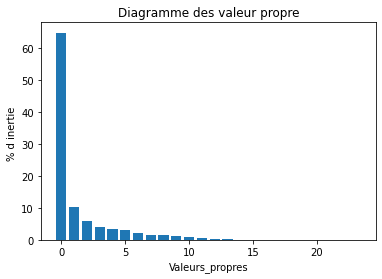

In [420]:
#Diagramme valeurs propres
x_diag=[]
for i in range(len(val_pro)):
    x_diag.append(i)


plt.bar(x_diag, contrib)
plt.title('Diagramme des valeur propre')
plt.xlabel("Valeurs_propres")
plt.ylabel("% d inertie ")
plt.show()

In [403]:
#Calcul des projetés
proj=np.dot(SD,eigval[1])

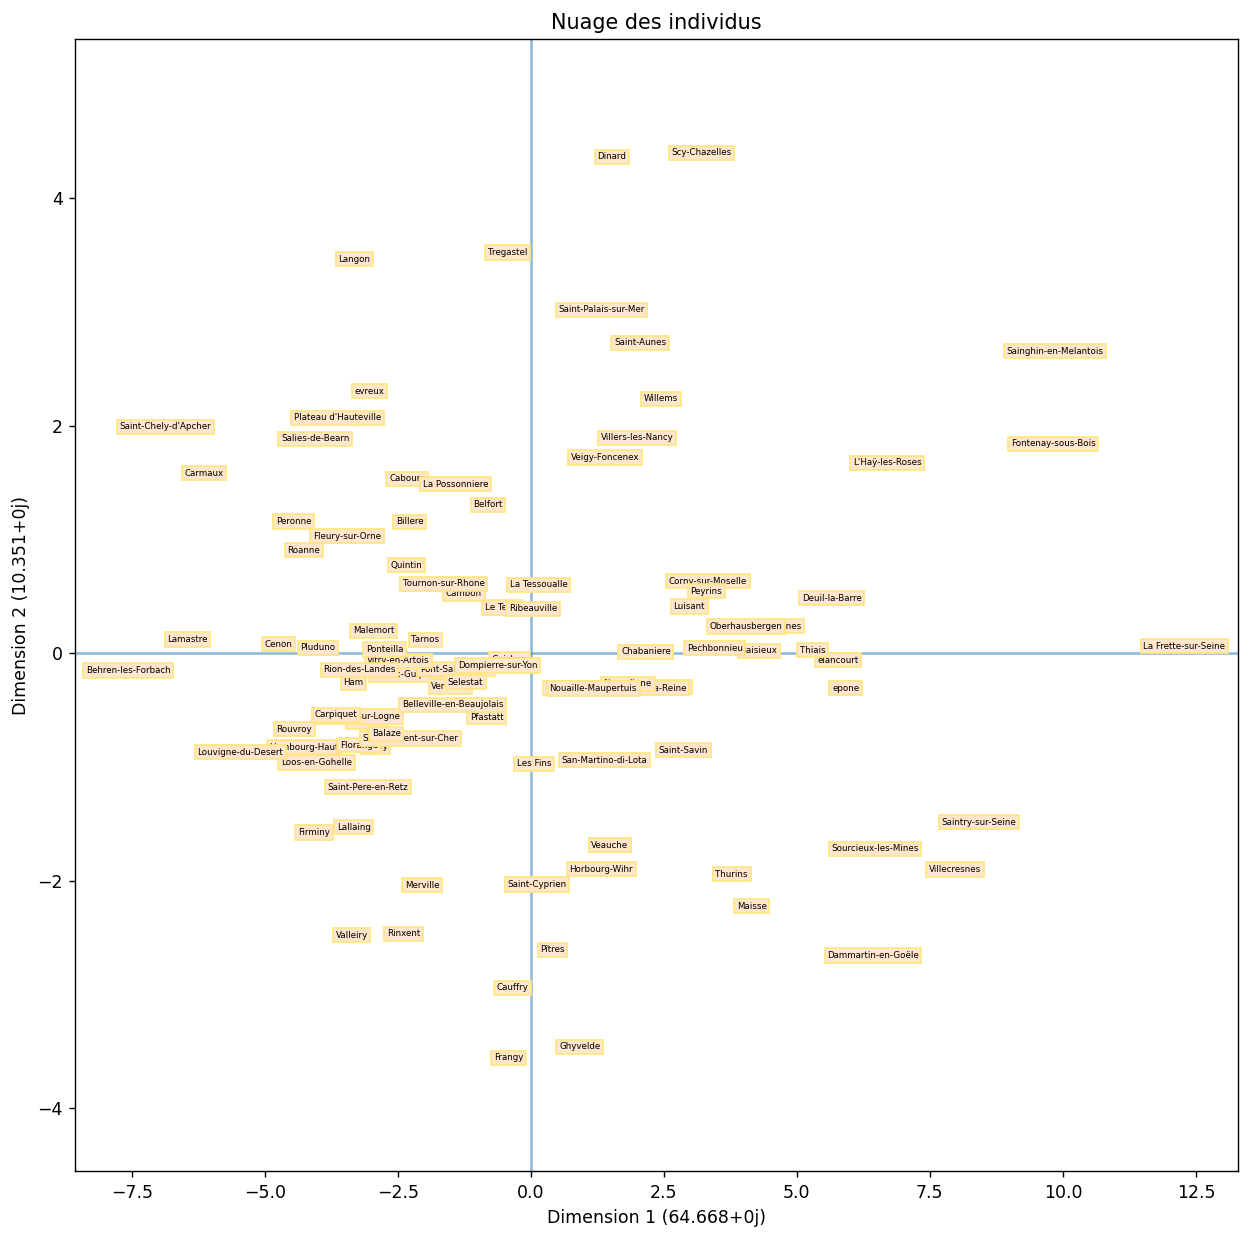

In [423]:
#Representation des individus 
figure(figsize=(12, 12), dpi=125)
plt.title('Nuage des individus')
plt.scatter(proj[:,0],proj[:,1])
plt.xlim((min(proj[:,0]))-1,(max(proj[:,0])+1))
plt.ylim((min(proj[:,1]))-1,(max(proj[:,1])+1))
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)
plt.xlabel("Dimension 1 "+(str(contrib[0])))
plt.ylabel("Dimension 2 "+(str(contrib[1])))
for i in range(data.shape[0]):
    plt.annotate(data.index[i],(proj[:,0][i], proj[:,1][i]), size=5,
         ha="center", va="center",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=(1., 0.9, 0.8)
                   )
         )
    
plt.show()

In [430]:
#Coordonnées x,y du cercles des corrélations

corX=[]
for i in range(data.shape[1]):
    corX.append(pearsonr(proj[:,0],data[:,i]))

corY=[]
for i in range(data.shape[1]):
    corY.append(pearsonr(proj[:,1],data[:,i]))

cor_x=[]
for i in range(len(corX)):
    cor_x.append(corX[i][0])

cor_y=[]
for i in range(len(corY)):
    cor_y.append(corY[i][0])
cor_y

[0.12232662005452045,
 0.4586510919014334,
 -0.09840682620229496,
 -0.1908255665275022,
 -0.749404847010658,
 0.1257199805154248,
 0.3655739804460558,
 -0.005458933229767572,
 -0.12826240226599625,
 -0.5908109791035447,
 0.13736285441132784,
 0.4543852732693263,
 -0.06321589890907993,
 -0.2760520391722808,
 -0.7373551221358625,
 -0.2579702504075244,
 0.07871748999866476,
 0.18569749192708015,
 -0.09137816645396526,
 0.10590748696826835,
 0.1434173084268816,
 -0.2811747385399953,
 0.07622637810134428,
 0.2341024389387064]

In [414]:
#Qualité de la representation sur les deux axes

Qx=[]
for i in range(data.shape[0]):
    Qx.append((np.dot(np.transpose(vect_pro_princ[0]),SD[i])*np.dot(np.transpose(SD[i]),vect_pro_princ[0]))/data.shape[0])

Qy=[]
for i in range(data.shape[0]):
    Qy.append((np.dot(np.transpose(vect_pro_princ[1]),SD[i])*np.dot(np.transpose(SD[i]),vect_pro_princ[1]))/data.shape[0])


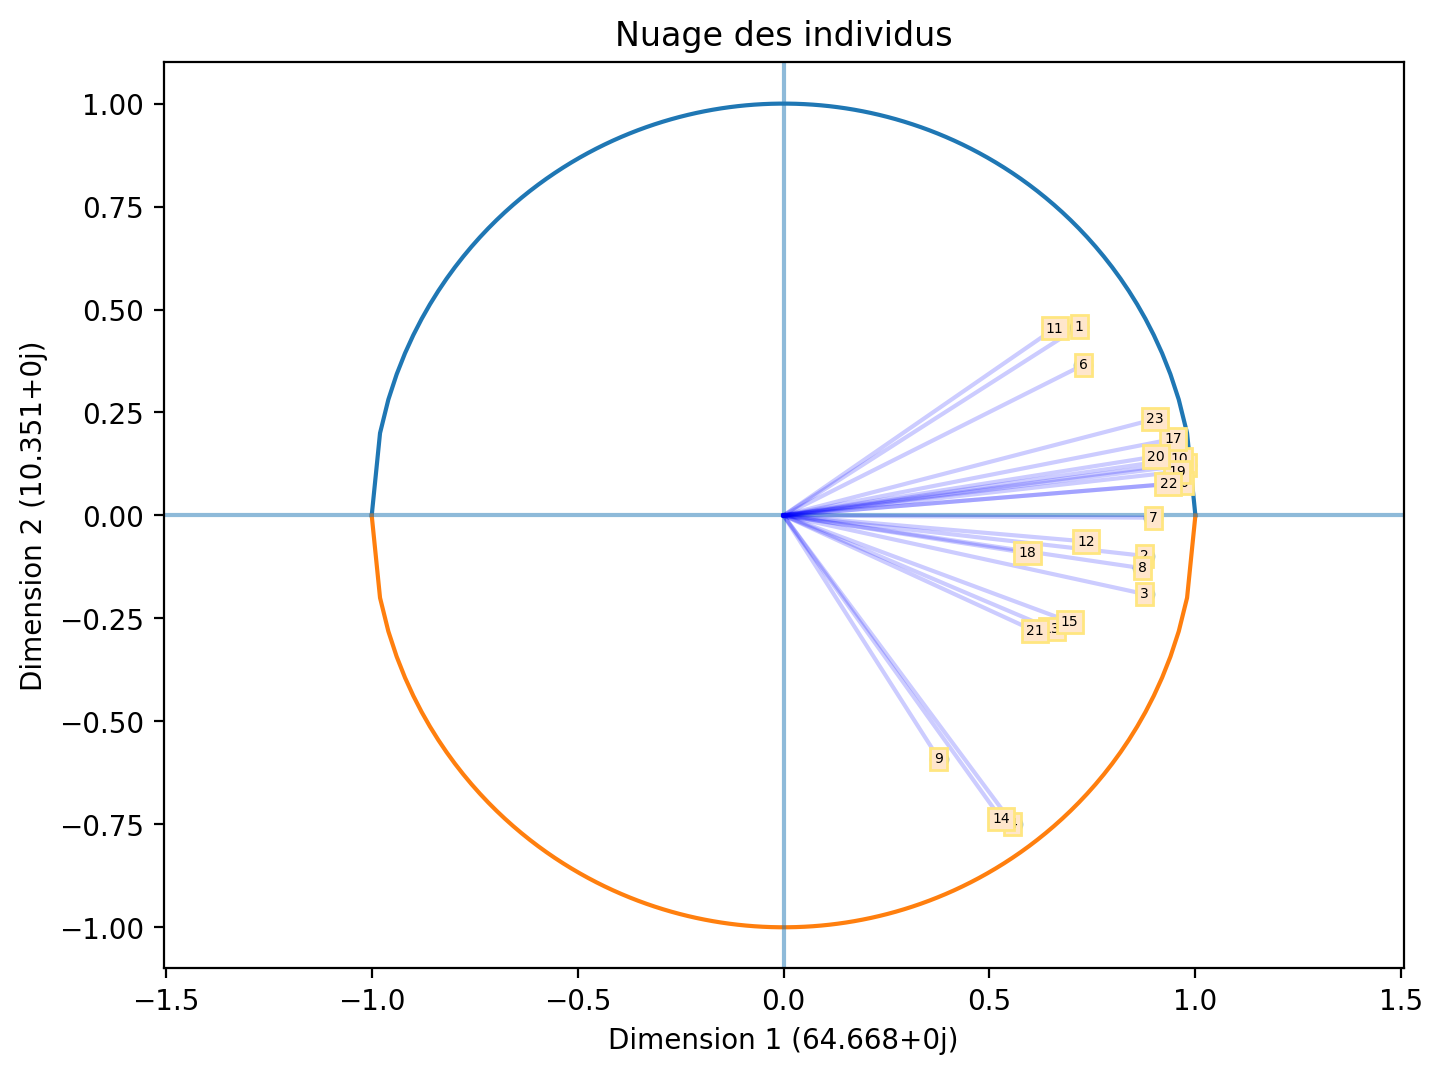

In [426]:
#Cercle des correlation

figure(figsize=(8, 6), dpi=200)
x=linspace(-1,1,100)
y=sqrt(1-x**2)
plot(x,y)
plot(x,-y)
plt.title('Nuage des individus')
plt.axvline(0,alpha=0.5)
plt.axhline(0,alpha=0.5)
plt.scatter(cor_x,cor_y)
plt.xlabel("Dimension 1 "+(str(contrib[0])))
plt.ylabel("Dimension 2 "+(str(contrib[1])))
axis('equal')
for i in range(data.shape[1]):
    plt.plot([0,cor_x[i]],[0,cor_y[i]],color = 'blue',alpha = 0.2)
    plt.text(cor_x[i], cor_y[i], i, size=5,
         ha="center", va="center",
            bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=(1., 0.9, 0.8)
                   )
         
         )

show()